# Downtime categories

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# configure plot styles
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["figure.dpi"] = 96
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.titleweight"] = "semibold"
plt.rcParams["axes.titleweight"] = "semibold"
plt.rcParams["figure.titlesize"] = "13"
plt.rcParams["axes.titlesize"] = "12"
plt.rcParams["axes.labelsize"] = "10"

In [3]:
data_cat = pd.read_csv("data/processed/downtime_categories.csv")
data_ts = pd.read_csv(
    "data/processed/downtime_timeseries.csv",
    lineterminator="\n",
    parse_dates=["timestamp_start", "timestamp_end"]
)

In [4]:
data_ts["period"] = data_ts["timestamp_end"] - data_ts["timestamp_start"]
data_ts["period"] = data_ts["period"].dt.total_seconds() / (60 * 60)

In [5]:
data = pd.DataFrame(data_ts.groupby(["TurbineCategory_id"]).count()["id"])
data.rename(columns={"id": "frequency"}, inplace=True)
data["Category"] = data.index

In [6]:
data["period"] = data_ts.groupby(["TurbineCategory_id"]).sum()["period"]

In [7]:
data["frequency/t/y"] = data["frequency"] / (25 * 2.5)
data["period/t/y"] = data["period"] / (25 * 2.5)

In [8]:
data_cat = data_cat[data_cat["Type"] == "Turbine"]
data_cat = data_cat.drop(columns=["Type"])

In [9]:
data = pd.concat([data, data_cat], axis=1)
data.fillna(0, inplace=True)
data.sort_values(by="frequency", inplace=True)

In [10]:
data

,frequency,Category,period,frequency/t/y,period/t/y,Category,Name
17,0.0,0.0,0.000000,0.000,0.000000,17,Retrofit
0,0.0,0.0,0.000000,0.000,0.000000,0,Unknown
14,0.0,0.0,0.000000,0.000,0.000000,14,Noise Constraints
21,1.0,21.0,3.560278,0.016,0.056964,21,Delayed Startup
4,9.0,4.0,5.441111,0.144,0.087058,4,Main Shaft
12,11.0,12.0,0.245278,0.176,0.003924,12,Unlogged manual stop
19,58.0,19.0,542.960833,0.928,8.687373,19,Hub
16,214.0,16.0,408.461667,3.424,6.535387,16,Tower
9,227.0,9.0,493.191667,3.632,7.891067,9,Hydraulics
3,256.0,3.0,596.369167,4.096,9.541907,3,Rotor Brake


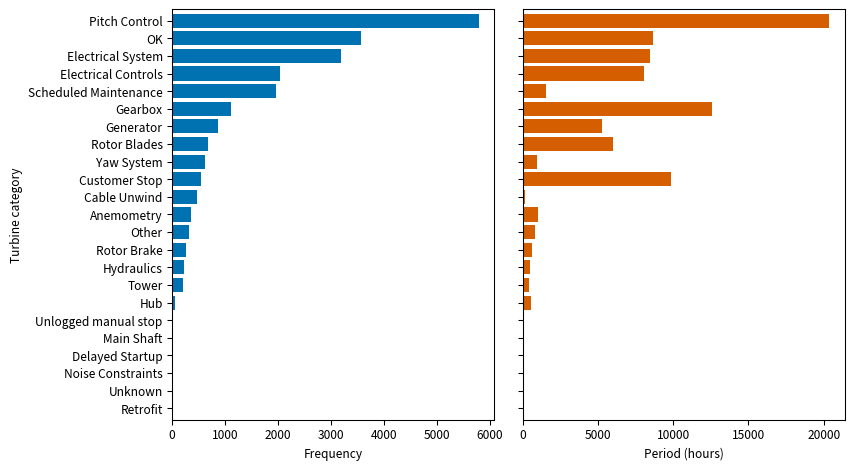

In [11]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(9, 5))
data.plot.barh("Name", "frequency", ax=ax[0], color="C0", width=.8)
data.plot.barh("Name", "period", ax=ax[1], color="C2", width=.8)
ax[0].set_ylabel("Turbine category")
ax[0].set_xlabel("Frequency")
ax[1].set_xlabel("Period (hours)")
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.tight_layout()
plt.minorticks_off()
plt.show()

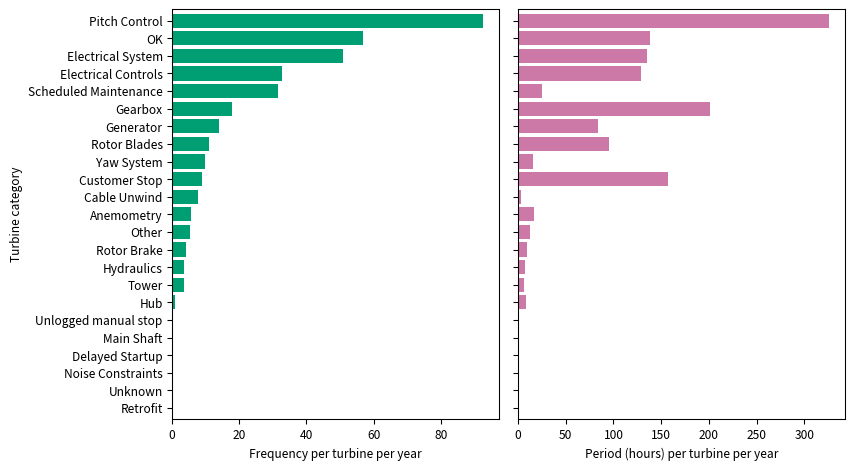

In [12]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(9, 5))
data.plot.barh("Name", "frequency/t/y", ax=ax[0], color="C1", width=.8)
data.plot.barh("Name", "period/t/y", ax=ax[1], color="C3", width=.8)
ax[0].set_ylabel("Turbine category")
ax[0].set_xlabel("Frequency per turbine per year")
ax[1].set_xlabel("Period (hours) per turbine per year")
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.tight_layout()
plt.minorticks_off()
plt.show()